In [1]:
import os
import jax
import jax.numpy as jnp

import matplotlib.pyplot as plt
import numpy as np

/Users/grieser/Projects/alphagrad/src/alphagrad/eval/RoeFlux_3d/A0_data
A0_RoeFlux_3d_541.csv (1500,)
A0_RoeFlux_3d_42.csv (1500,)
A0_RoeFlux_3d_1743.csv (1500,)
A0_RoeFlux_3d_250197.csv (1500,)
A0_RoeFlux_3d_1337.csv (1500,)


/tmp/ipykernel_2899778/3381637195.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


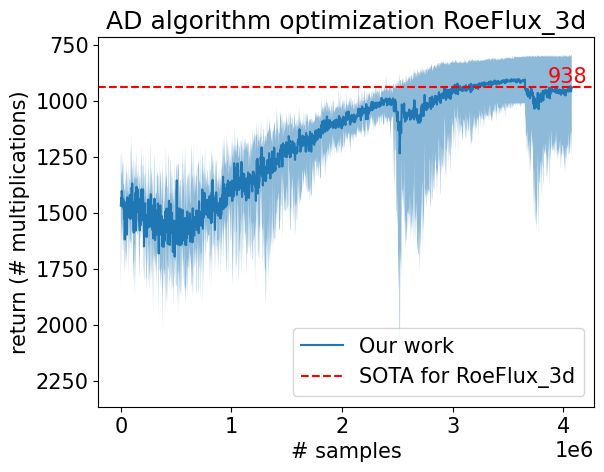

In [2]:
font = {"family" : "normal",
        "weight" : "normal",
        "size"   : 15}

plt.rc('font', **font)

runs = []
print(os.path.join(os.getcwd(), "A0_data"))
for file in os.listdir(path=os.path.join(os.getcwd(), "A0_data")):
				if file.endswith(".csv"):
								data = np.genfromtxt(os.path.join(os.getcwd(), "A0_data/", file), delimiter=",", skip_header=1)
								num_samples = data[:1500, 0]*32*85
								num_muls = data[:1500, 1]
								print(file, num_muls.shape)
								runs.append(num_muls)

data = jnp.stack(runs, axis=0)

data_mean = jnp.mean(data, axis=0)
data_max = jnp.max(data, axis=0)
data_min	= jnp.min(data, axis=0)
data_err = jnp.stack([data_min, data_max], axis=0)


fig, ax = plt.subplots()
ax.plot(num_samples, data_mean, label="Our work")
ax.fill_between(num_samples, data_min, data_max, alpha=0.5)
ax.axhline(y=-938., color="r", linestyle="--", label="SOTA for RoeFlux_3d")
ax.annotate("938", (num_samples[-1], -938), textcoords="offset points", xytext=(-3, 3), ha="center", color="red")
ax.set_xlabel("# samples")
ax.set_ylabel("return (# multiplications)")
ax.set_title("AD algorithm optimization RoeFlux_3d")

ticks = ax.get_yticks()
labels = ax.get_yticklabels()
labels = [str(int(-t)) for t in ticks]
ax.set_yticklabels(labels)

ax.legend(loc="lower right")

In [2]:
from graphax.perf import plot_performance
from graphax.examples import RoeFlux_3d

In [7]:
# 811 mults
order = [124, 136, 56, 128, 78, 24, 1, 54, 101, 127, 121, 140, 47, 135, 67, 34, 
         111, 32, 100, 119, 99, 114, 125, 141, 122, 45, 65, 59, 117, 89, 116, 
         60, 42, 28, 74, 85, 11, 53, 36, 30, 108, 113, 55, 109, 129, 64, 91, 
         14, 133, 5, 10, 132, 87, 139, 110, 12, 131, 72, 8, 61, 88, 107, 6, 29, 
         57, 96, 118, 105, 71, 77, 112, 66, 75, 84, 143, 123, 90, 94, 137, 104, 
         69, 23, 22, 62, 58, 50, 130, 31, 106, 39, 48, 49, 98, 134, 93, 138, 
         126, 68, 115, 80, 102, 92, 79, 52, 16, 120, 95, 76, 19, 25, 73, 21, 70, 
         38, 35, 20, 86, 41, 4, 103, 43, 27, 3, 40, 9, 83, 13, 18, 37, 51, 46, 
         7, 81, 97, 63, 44, 2, 33, 82, 26, 15, 17, 145] 

mM_order = [81, 82, 90, 91, 4, 5, 9, 10, 12, 14, 21, 22, 23, 24, 30, 31, 32, 33, 
            39, 41, 45, 47, 48, 54, 55, 59, 75, 78, 80, 84, 89, 93, 126, 129, 
            132, 133, 3, 6, 25, 28, 34, 37, 40, 42, 49, 56, 58, 62, 64, 65, 67, 
            71, 74, 77, 85, 87, 94, 96, 98, 99, 100, 101, 102, 104, 105, 107, 
            109, 110, 112, 114, 116, 117, 119, 121, 123, 125, 127, 130, 134, 
            136, 138, 26, 29, 35, 38, 46, 57, 61, 68, 72, 83, 88, 92, 97, 111, 
            118, 124, 131, 137, 141, 11, 19, 20, 50, 53, 60, 70, 103, 106, 113, 
            120, 135, 86, 95, 13, 15, 43, 52, 66, 128, 145, 69, 73, 18, 139, 27, 
            36, 140, 108, 122, 115, 1, 51, 76, 79, 63, 2, 44, 16, 7, 8, 143, 17] 

In [8]:
batchsize = 512
ul0 = jnp.array([.1])
ul = jnp.array([.1, .2, .3])
ul4 = jnp.array([.5])
ur0 = jnp.array([.2])
ur = jnp.array([.2, .2, .4])
ur4 = jnp.array([.6])
xs = (ul0, ul, ul4, ur0, ur, ur4)
xs = [jnp.tile(x[jnp.newaxis, ...], (batchsize, 1)) for x in xs]
xs = jax.device_put(xs, jax.devices("cpu")[0])
jax.vmap(RoeFlux_3d)(*xs)

(Array([[0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0

124 : 1024
136 : 1024
56 : 1024
128 : 1024
78 : 512
24 : 0
1 : 4096
54 : 512
101 : 1024
127 : 1024
121 : 1024
140 : 0
47 : 0
135 : 1024
67 : 1024
34 : 1024
111 : 1024
32 : 0
100 : 1024
119 : 1024
99 : 3072
114 : 1024
125 : 1536
141 : 1024
122 : 4608
45 : 1536
65 : 1024
59 : 0
117 : 1024
89 : 0
116 : 1024
60 : 1024
42 : 1024
28 : 1024
74 : 1024
85 : 3072
11 : 4096
53 : 2048
36 : 1024
30 : 1536
108 : 3072
113 : 1536
55 : 0
109 : 1024
129 : 512
64 : 1024
91 : 0
14 : 1536
133 : 0
5 : 0
10 : 2048
132 : 512
87 : 1024
139 : 1536
110 : 1024
12 : 1536
131 : 3072
72 : 1024
8 : 1053696
61 : 1536
88 : 1536
107 : 3072
6 : 1024
29 : 1536
57 : 2048
96 : 1024
118 : 1536
105 : 1024
71 : 1536
77 : 1024
112 : 1024
66 : 4096
75 : 1024
84 : 0
143 : 12288
123 : 1024
90 : 0
94 : 3072
137 : 1536
104 : 1536
69 : 2048
23 : 512
22 : 1536
62 : 4096
58 : 3072
50 : 1024
130 : 2048
31 : 1536
106 : 6144
39 : 512
48 : 512
49 : 2048
98 : 1024
134 : 1024
93 : 0
138 : 2048
126 : 512
68 : 4096
115 : 12288
80 : 0
102 : 102

100%|██████████| 1000/1000 [01:17<00:00, 12.92it/s]


81 : 0
82 : 0
90 : 0
91 : 0
4 : 0
5 : 0
9 : 512
10 : 512
12 : 1536
14 : 1536
21 : 1536
22 : 1536
23 : 0
24 : 1536
30 : 1536
31 : 1536
32 : 0
33 : 1536
39 : 512
41 : 512
45 : 1536
47 : 0
48 : 512
54 : 512
55 : 0
59 : 0
75 : 512
78 : 512
80 : 0
84 : 0
89 : 0
93 : 0
126 : 512
129 : 512
132 : 512
133 : 0
3 : 0
6 : 1024
25 : 2048
28 : 1024
34 : 2048
37 : 1024
40 : 1024
42 : 1024
49 : 1024
56 : 1024
58 : 3072
62 : 1024
64 : 1024
65 : 786944
67 : 1024
71 : 1024
74 : 1024
77 : 1024
85 : 3072
87 : 1024
94 : 3072
96 : 1024
98 : 1024
99 : 3072
100 : 1024
101 : 1024
102 : 1024
104 : 1024
105 : 1024
107 : 1024
109 : 1024
110 : 1024
112 : 1024
114 : 1024
116 : 1024
117 : 1024
119 : 1024
121 : 1024
123 : 1024
125 : 1024
127 : 1024
130 : 1024
134 : 1024
136 : 1024
138 : 1024
26 : 2560
29 : 1536
35 : 2560
38 : 1536
46 : 4608
57 : 2560
61 : 1536
68 : 1536
72 : 1536
83 : 0
88 : 1536
92 : 0
97 : 1536
111 : 1536
118 : 1536
124 : 1536
131 : 1536
137 : 1536
141 : 1536
11 : 4096
19 : 0
20 : 0
50 : 4096
53 : 2

100%|██████████| 1000/1000 [01:41<00:00,  9.85it/s]


145 : 1024
143 : 3072
141 : 1024
140 : 0
139 : 1024
138 : 1024
137 : 1024
136 : 1024
135 : 1024
134 : 1024
133 : 0
132 : 512
131 : 1024
130 : 1024
129 : 512
128 : 1024
127 : 1024
126 : 512
125 : 1024
124 : 1024
123 : 1024
122 : 3072
121 : 3072
120 : 3072
119 : 3072
118 : 3072
117 : 3072
116 : 3072
115 : 3072
114 : 3072
113 : 3072
112 : 3072
111 : 3072
110 : 3072
109 : 3072
108 : 3072
107 : 3072
106 : 3072
105 : 3072
104 : 3072
103 : 1024
102 : 1024
101 : 1024
100 : 1024
99 : 3072
98 : 1024
97 : 1024
96 : 1024
95 : 3072
94 : 3072
93 : 0
92 : 0
91 : 0
90 : 0
89 : 0
88 : 1024
87 : 1024
86 : 3072
85 : 3072
84 : 0
83 : 0
82 : 0
81 : 0
80 : 0
79 : 5120
78 : 2560
77 : 5120
76 : 5120
75 : 2560
74 : 5120
73 : 5120
72 : 5120
71 : 5120
70 : 5120
69 : 4096
68 : 4096
67 : 4096
66 : 4096
65 : 4096
64 : 4096
63 : 5120
62 : 5120
61 : 5120
60 : 5120
59 : 0
58 : 15360
57 : 5120
56 : 5120
55 : 0
54 : 2560
53 : 5120
52 : 5120
51 : 2560
50 : 2560
49 : 5120
48 : 0
47 : 2560
46 : 7680
45 : 7680
44 : 5120
43 

100%|██████████| 1000/1000 [01:30<00:00, 11.07it/s]


1 : 4096
2 : 3072
3 : 3145728
4 : 1572864
5 : 1572864
6 : 1024
7 : 5120
8 : 5120
9 : 512
10 : 512
11 : 4096
12 : 1536
13 : 3072
14 : 1536
15 : 3072
16 : 6144
17 : 12288
18 : 18874368
19 : 12582912
20 : 12582912
21 : 1536
22 : 1536
23 : 0
24 : 1536
25 : 2048
26 : 2560
27 : 5120
28 : 2560
29 : 2560
30 : 1536
31 : 1536
32 : 0
33 : 1536
34 : 2048
35 : 2560
36 : 5120
37 : 2560
38 : 2560
39 : 512
40 : 2560
41 : 512
42 : 2560
43 : 5120
44 : 20480
45 : 6144
46 : 4096
47 : 0
48 : 4096
49 : 5120
50 : 10240
51 : 25600
52 : 6294528
53 : 4196352
54 : 5120
55 : 4096
56 : 5120
57 : 5120
58 : 0
59 : 4096
60 : 5120
61 : 5120
62 : 5120
63 : 12589056
64 : 2097152
65 : 2097152
66 : 4194304
67 : 2097152
68 : 2097152
69 : 4194304
70 : 4196352
71 : 2097152
72 : 2097152
73 : 4196352
74 : 2098176
75 : 2098176
76 : 10490880
77 : 2098176
78 : 2098176
79 : 10490880
80 : 1048576
81 : 0
82 : 0
83 : 7680
84 : 0
85 : 3072
86 : 7680
87 : 2560
88 : 1049088
89 : 1048576
90 : 0
91 : 0
92 : 7680
93 : 0
94 : 3072
95 : 7680

100%|██████████| 1000/1000 [01:22<00:00, 12.10it/s]


fwd mean: 74.37995910644531, rev mean: 85.41849517822266, mM mean: 94.329345703125, cc mean: 70.17649841308594
fwd err: [-4.1312027  2.3700943], rev err: [-4.980797 12.393654], mM err: [-11.33976   10.837952], cc err: [-4.767807  4.230568]


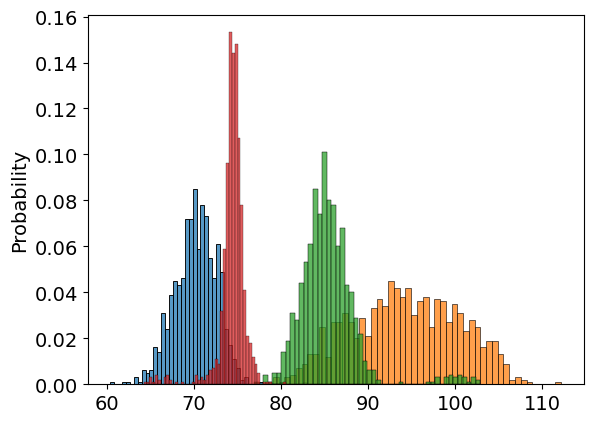

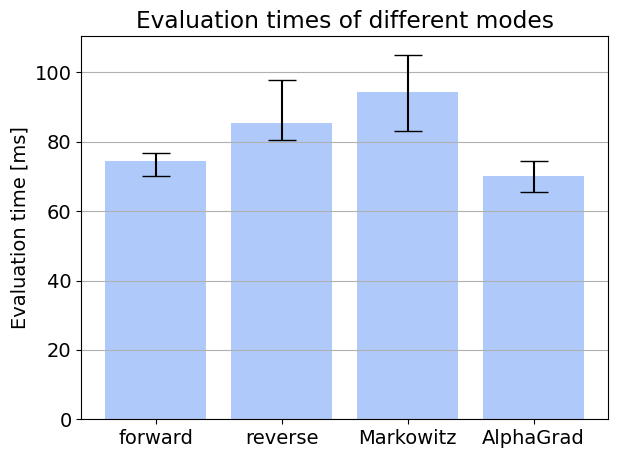

In [10]:
plot_performance(RoeFlux_3d, xs, order, mM_order, "./RoeFlux_3d.png", samplesize=1000)

### The best
fwd mean: 72.26496124267578, rev mean: 83.98908233642578, mM mean: 91.27364349365234, cc mean: 63.920318603515625
fwd err: [-6.021797  3.225006], rev err: [-6.68058    5.6919937], mM err: [-16.490898  11.513664], cc err: [-5.7627106  4.453911 ]

fwd mean: 3.8236873149871826, rev mean: 3.6495230197906494, cc_mean: 2.9825470447540283, mM_mean: 3.825319290161133
fwd std: 0.2087354212999344, rev std: 0.39476415514945984, cc_std: 0.6004145741462708, mM_std: 0.47684094309806824

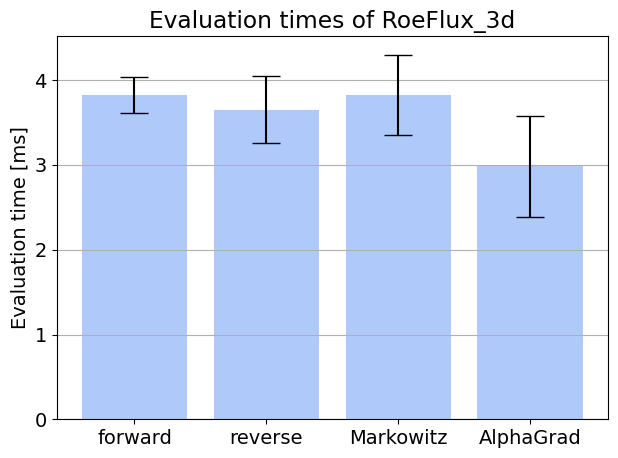

In [6]:
# Order: fwd, rev, mM, cc
means = jnp.array([3.8236873149871826, 3.6495230197906494, 3.825319290161133, 2.9825470447540283])
stds = jnp.array([0.2087354212999344, 0.39476415514945984, 0.47684094309806824, 0.6004145741462708])
x_pos = jnp.arange(len(means))
modes = ["forward", "reverse", "Markowitz", "AlphaGrad"]


fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=stds, align="center", alpha=0.5, 
            ecolor="black", color="#6096f6", capsize=10)
    
ax.set_ylabel("Evaluation time [ms]", fontsize=14)
ax.set_xticks(x_pos)
ax.set_xticklabels(modes, fontsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.set_title(f"Evaluation times of RoeFlux_3d")
ax.yaxis.grid(True)  
# ax.set_ylim((0.025, 0.04))

plt.tight_layout()